<a href="https://colab.research.google.com/github/iamutkarshgoyal/Aerofit_Statistical_Analysis/blob/main/Aerofit_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# importing all required liabraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# importing data and assigning it to df variable
df = pd.read_csv("/content/drive/MyDrive/Data_Sets Analysis/Aerofit Data.csv")

In [3]:
# Checking top 5 values using head command
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
# Checking bottom 5 values using tail command
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [5]:
# Checking Shape of Data meand row count and column counts
df.shape

(180, 9)

In [6]:
# Column names in given data
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
# Checking how many unique value have in columns
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [8]:
# Checking if there is any null value in columns
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False])

In [9]:
# Getting some statistical measure for all integer columns
df.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In [10]:
# Checking data type and other information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [11]:
# Getting some statistical measure for all String/Object columns
df.describe(include = "object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [12]:
# Checking mean or average value for few columns
print("Average Age of People =", int(df.Age.mean().round()))
print("Average Fitness Rank of People =", int(df.Fitness.mean().round()))
print("Average Education of People =", int(df.Education.mean().round()))
print("Average income of People =", df.Income.mean().round(2))
print("Average Miles People Run =", df.Miles.mean().round(2))

Average Age of People = 29
Average Fitness Rank of People = 3
Average Education of People = 16
Average income of People = 53719.58
Average Miles People Run = 103.19


In [13]:
# Checking median or middle value for few columns
print("Median Value in Age Column =", int(df.Age.median().round()))
print("Median Value in Fitness Column =", int(df.Fitness.median().round()))
print("Median Value in Education Column =", int(df.Education.median().round()))
print("Median Value in income Column =", df.Income.median().round(2))
print("Median Value in Miles Column =", df.Miles.median().round(2))

Median Value in Age Column = 26
Median Value in Fitness Column = 3
Median Value in Education Column = 16
Median Value in income Column = 50596.5
Median Value in Miles Column = 94.0


In [27]:
# Checking mode or most repeated value for few columns
print(f"Most repeated value in Age column is", int(df.Age.mode().round()), "which repeated", df[df["Age"] == df.Age.mode().values[0]]["Age"].value_counts().values[0],"times.")
print(f"Most repeated value in Fitness column is", int(df.Fitness.mode().round()), "which repeated", df[df["Fitness"] == df.Fitness.mode().values[0]]["Fitness"].value_counts().values[0],"times.")
print(f"Most repeated value in Education column is", int(df.Education.mode().round()), "which repeated", df[df["Education"] == df.Education.mode().values[0]]["Education"].value_counts().values[0],"times.")
print(f"Most repeated value in Income column is", int(df.Income.mode().round()), "which repeated", df[df["Income"] == df.Income.mode().values[0]]["Income"].value_counts().values[0],"times.")
print(f"Most repeated value in Miles column is", int(df.Miles.mode().round()), "which repeated", df[df["Miles"] == df.Miles.mode().values[0]]["Miles"].value_counts().values[0],"times.")

Most repeated value in Age column is 25 which repeated 25 times.
Most repeated value in Fitness column is 3 which repeated 97 times.
Most repeated value in Education column is 16 which repeated 85 times.
Most repeated value in Income column is 45480 which repeated 14 times.
Most repeated value in Miles column is 85 which repeated 27 times.


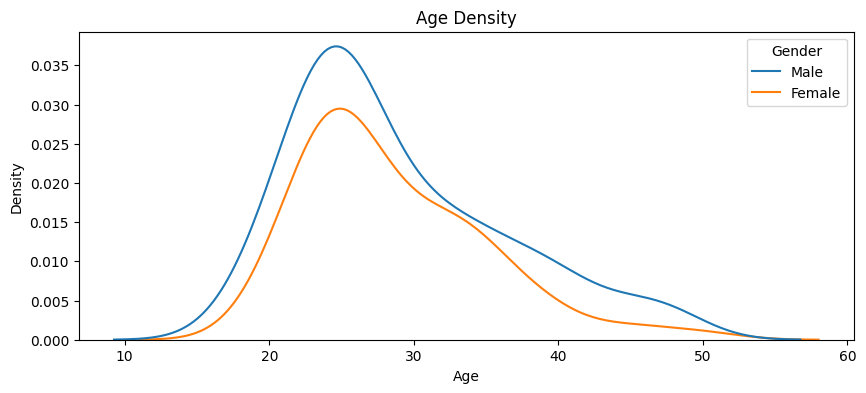

In [25]:
# Plotting a density chart to measure for what age we have more people
plt.figure(figsize = (10,4))
sns.kdeplot(data = df, x = "Age", hue = "Gender")
plt.title("Age Density")
plt.show()

As per above diagram, most of the people are between Age 20 to 27 including Male and Female.

As per univariate analysis on Age column, we can see we have More male then Female.


In [18]:
z = norm.ppf(0.96)
z

1.7506860712521692

In [20]:
x = 65+(z*2.5)
x

69.37671517813042

In [22]:
norm.cdf(z)

0.96